- Load Files

In [1]:
import pandas as pd

train = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/sales_train.csv', nrows=47022)
test = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/sales_test.csv')
sample_submission = pd.read_csv('/kaggle/input/rohlik-sales-forecasting-challenge-v2/solution.csv')

- Fill NaN missing values with 0 

In [2]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

- Capping outliers

In [3]:
numerical_columns_train = train.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns_train:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train[col] = train[col].clip(lower=lower_bound, upper=upper_bound)

train

,unique_id,date,warehouse,total_orders,sales,sell_price_main,availability,type_0_discount,type_1_discount,type_2_discount,type_3_discount,type_4_discount,type_5_discount,type_6_discount
0,4845,2024-03-10,Budapest_1,6436.0,16.34,194.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4845,2021-05-25,Budapest_1,4663.0,12.63,194.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4845,2021-12-20,Budapest_1,6507.0,34.55,194.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4845,2023-04-29,Budapest_1,5463.0,34.52,194.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4845,2022-04-01,Budapest_1,5997.0,35.92,194.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47017,3656,2021-05-26,Prague_3,4529.0,72.37,10.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47018,3656,2022-04-03,Prague_3,4751.0,73.26,10.79,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47019,3656,2021-06-16,Prague_3,4287.0,53.94,10.16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47020,3656,2022-11-09,Prague_3,4642.0,76.28,12.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- Calculating Customer Lifetime Value (CLV)

In [4]:
# Calculate average revenue per customer
average_revenue_per_customer = train.groupby('unique_id')['sales'].mean()

# Assuming customer lifespan is the number of unique dates for each customer
customer_lifespan = train.groupby('unique_id')['date'].nunique()

# Calculate CLV
clv = average_revenue_per_customer * customer_lifespan

clv

unique_id
355      51294.16250
625      57761.62125
724     240242.93750
745      43517.42875
827      51945.10000
915      43445.24000
958      48459.03875
965      24906.70000
1017     13292.70625
1048     11165.03000
1095     13168.81000
1545      6620.30000
1619     34708.29250
1755    144021.13375
1807     92471.94000
1865    231592.65750
2005     48845.23000
2232     33583.96000
2468    204672.92250
2571     35012.80875
2631      4571.58000
2706    151629.25875
2910     59528.84250
2915     43384.52000
3200    273020.83875
3285     58759.26500
3507    133516.89250
3656    104703.25875
3767       529.28000
3858     23725.33500
3863     66763.18000
4044    118791.34375
4167     14890.68000
4168     11163.93000
4227    274158.30375
4484     25187.74500
4511    104221.14500
4540     68692.53000
4826     36915.90500
4829     15937.96000
4845     29879.55000
5033     86879.74625
dtype: float64

- Calculate Average Revenue per Order

In [5]:
# Total revenue is the sum of 'sales', and total orders is the sum of 'total_orders'

total_revenue = train['sales'].sum()
total_orders = train['total_orders'].sum()

average_revenue_per_order = total_revenue / total_orders
average_revenue_per_order

0.010896574039231964

- Total income generated from sales

In [6]:
total_income = train['sales'].sum()
total_income

3137579.1100000003

- Convert 'date' column to datetime format 

In [7]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

- Calculate total sales per day, week, month,quarter

In [8]:
# Calculating total sales per day
total_sales_per_day = train.groupby(train['date'].dt.date)['sales'].sum()

# Calculating total sales per week
total_sales_per_week = train.groupby(train['date'].dt.to_period('W'))['sales'].sum()

# Calculating total sales per month
total_sales_per_month = train.groupby(train['date'].dt.to_period('M'))['sales'].sum()

# Calculating total sales per quarter
total_sales_per_quarter = train.groupby(train['date'].dt.to_period('Q'))['sales'].sum()

total_sales_per_day, total_sales_per_week, total_sales_per_month, total_sales_per_quarter

(date
 2020-08-01    1113.77750
 2020-08-02    1266.55750
 2020-08-03    1257.02750
 2020-08-04    1126.18875
 2020-08-05    1096.30750
                  ...    
 2024-05-29    2480.85250
 2024-05-30    2576.28375
 2024-05-31    2583.04375
 2024-06-01    2421.59375
 2024-06-02    2360.83500
 Name: sales, Length: 1402, dtype: float64,
 date
 2020-07-27/2020-08-02     2380.33500
 2020-08-03/2020-08-09     8342.11750
 2020-08-10/2020-08-16     9247.99000
 2020-08-17/2020-08-23     9160.74375
 2020-08-24/2020-08-30     9782.74125
                             ...     
 2024-04-29/2024-05-05    18416.89250
 2024-05-06/2024-05-12    16381.58500
 2024-05-13/2024-05-19    17397.87625
 2024-05-20/2024-05-26    16487.63625
 2024-05-27/2024-06-02    17260.41625
 Freq: W-SUN, Name: sales, Length: 201, dtype: float64,
 date
 2020-08    40343.76375
 2020-09    50200.15750
 2020-10    61108.60125
 2020-11    61705.32375
 2020-12    62422.29875
 2021-01    73054.10625
 2021-02    69542.26500
 2021-03  

- Visualize total sales per day, week, month,quarter

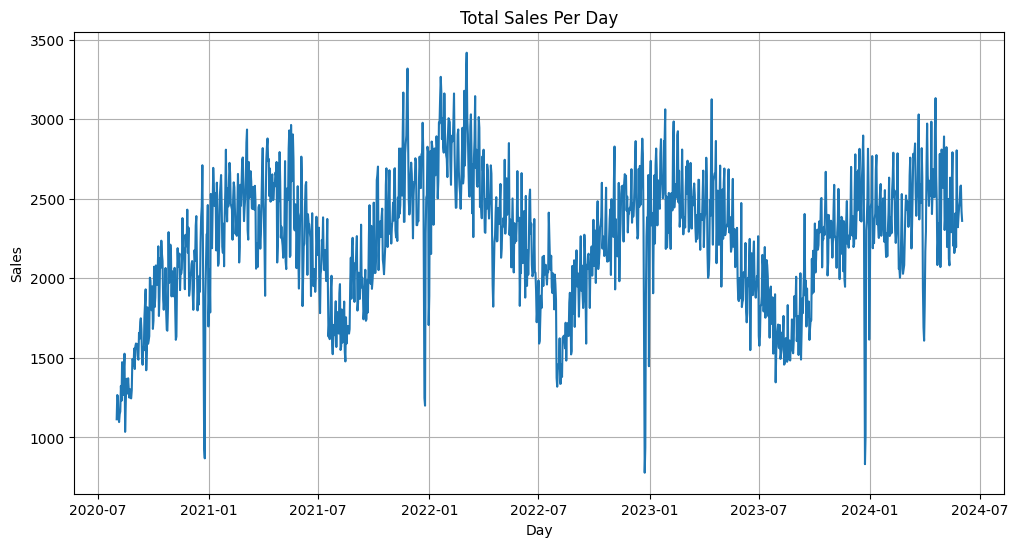

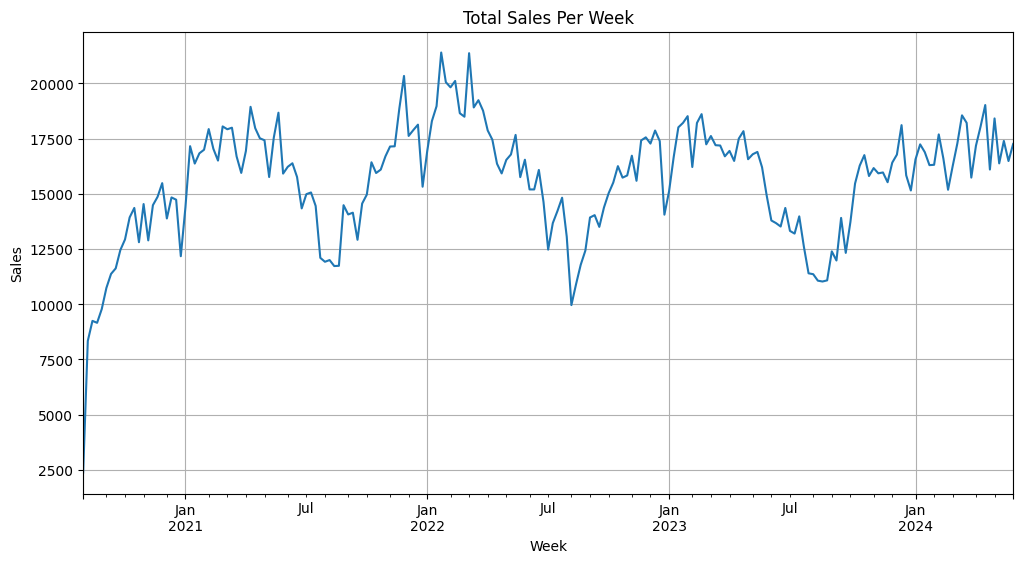

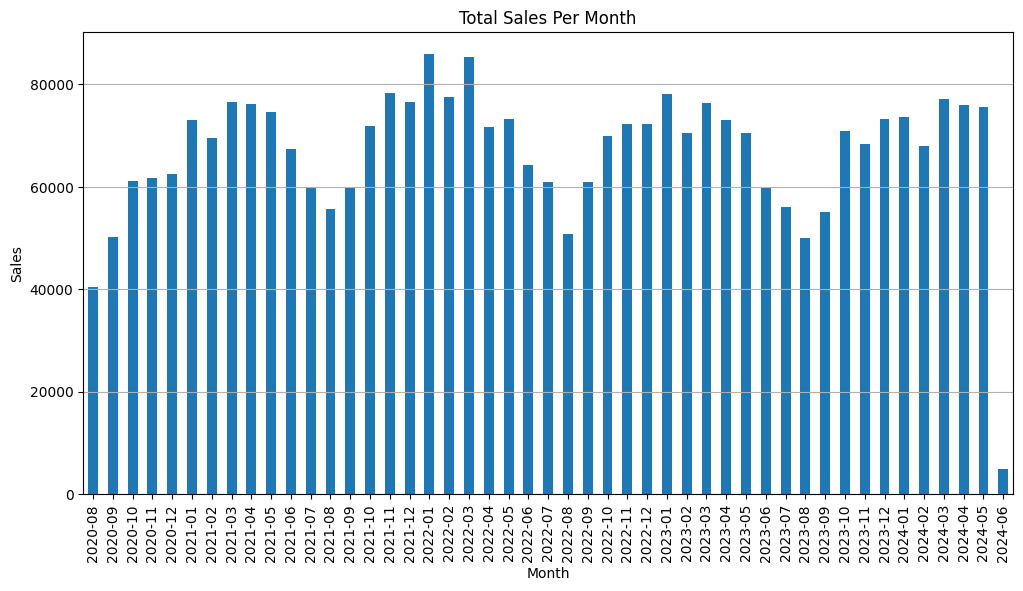

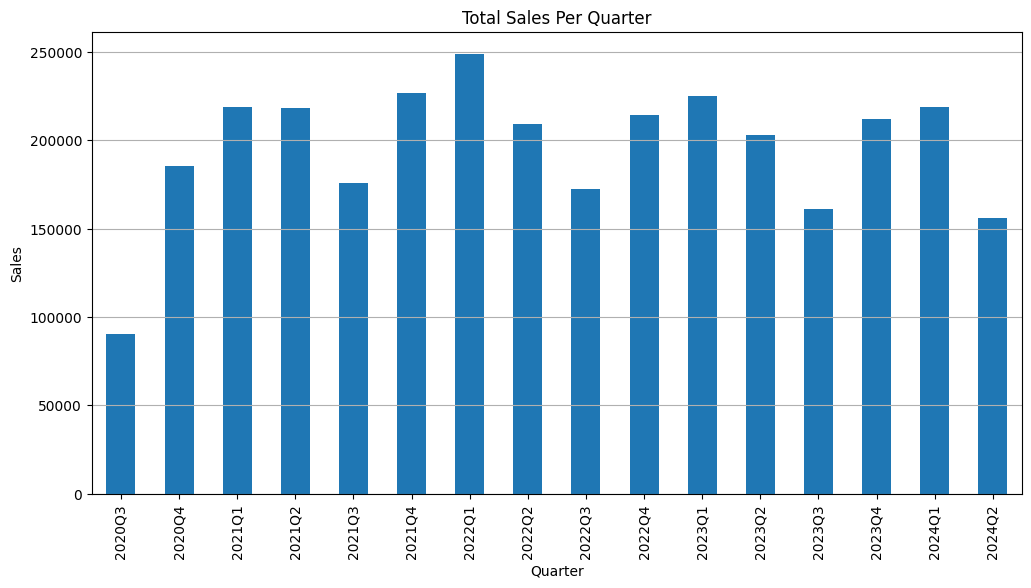

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing total sales per day
plt.figure(figsize=(12, 6))
total_sales_per_day.plot(kind='line', title='Total Sales Per Day', legend=False)
plt.xlabel('Day')
plt.ylabel('Sales')
plt.grid()
plt.show()

# Visualizing total sales per week
plt.figure(figsize=(12, 6))
total_sales_per_week.plot(kind='line', title='Total Sales Per Week', legend=False)
plt.xlabel('Week')
plt.ylabel('Sales')
plt.grid()
plt.show()

# Visualizing total sales per month
plt.figure(figsize=(12, 6))
total_sales_per_month.plot(kind='bar', title='Total Sales Per Month', legend=False)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show()

# Visualizing total sales per quarter
plt.figure(figsize=(12, 6))
total_sales_per_quarter.plot(kind='bar', title='Total Sales Per Quarter', legend=False)
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.grid(axis='y')
plt.show()

- Calculate churn rate (percentage of customers who stop using the service in a given time period)

In [10]:
from datetime import timedelta

# Getting the most recent date in the dataset
most_recent_date = train['date'].max()

# Define a time period (e.g., 1 year) for churn calculation

churn_period = timedelta(days=365)

# Identify active customers within the churn period
active_customers = train[train['date'] > (most_recent_date - churn_period)]['unique_id'].unique()

# Total customers
total_customers = train['unique_id'].nunique()

# Churned customers
churned_customers = total_customers - len(active_customers)

# Churn rate
churn_rate = (churned_customers / total_customers) * 100
churn_rate

2.380952380952381

The churn rate is 2.3%, indicating that customers have stopped using the service within the defined time period.

- Calculate the average number of transactions made by a customer 

In [11]:
# Total transactions
total_transactions = train.shape[0]

# Total customers
total_customers = train['unique_id'].nunique()

# Average number of transactions per customer
average_transactions_per_customer = total_transactions / total_customers
average_transactions_per_customer

1119.5714285714287

The average number of transactions made by a customer over the specified period is 1119.57

- Calculate the percentage of visitors who make a purchase

In [12]:
# Total visitors is the count of rows in the dataset
total_visitors = train.shape[0]

# Visitors who made a purchase
purchase_visitors = train[train['total_orders'] > 0].shape[0]

# Purchase percentage
purchase_percentage = (purchase_visitors / total_visitors) * 100
purchase_percentage

100.0

The percentage of visitors who make a purchase is 100%.

- Calculate the percentage of customers who continue to make purchases over time

In [13]:
# Identify customers who made purchases in each time period (e.g., year)
train['year'] = train['date'].dt.year
customers_per_year = train.groupby('year')['unique_id'].unique()

# Identify customers who made purchases in consecutive years
continuing_customers = set(customers_per_year.iloc[0])
for year_customers in customers_per_year[1:]:
    continuing_customers &= set(year_customers)

# Percentage of continue customers
total_percentage_customers = (len(continuing_customers) / total_customers) * 100
total_percentage_customers

69.04761904761905

The percentage of customers who continue to make purchases over time is 69%.

- Calculate correlations to find relationships between columns and sales

In [14]:
# Select numerical columns for correlation analysis
numerical_columns = train.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
correlation_matrix = train[numerical_columns].corr()

# Extract correlations with 'sales'
sales_correlations = correlation_matrix['sales'].sort_values(ascending=False)
sales_correlations

sales              1.000000
total_orders       0.329362
unique_id          0.024724
sell_price_main   -0.180175
availability            NaN
type_0_discount         NaN
type_1_discount         NaN
type_2_discount         NaN
type_3_discount         NaN
type_4_discount         NaN
type_5_discount         NaN
type_6_discount         NaN
Name: sales, dtype: float64

In [15]:
train['sales_per_day'] = train['date'].map(total_sales_per_day)
train['sales_per_week'] = train['date'].dt.to_period('W').map(total_sales_per_week)
train['sales_per_month'] = train['date'].dt.to_period('M').map(total_sales_per_month)
train['sales_per_quarter'] = train['date'].dt.to_period('Q').map(total_sales_per_quarter)

In [16]:
test['sales_per_day'] = test['date'].map(total_sales_per_day)
test['sales_per_week'] = test['date'].dt.to_period('W').map(total_sales_per_week)
test['sales_per_month'] = test['date'].dt.to_period('M').map(total_sales_per_month)
test['sales_per_quarter'] = test['date'].dt.to_period('Q').map(total_sales_per_quarter)

- One Hot Encoding

In [17]:
train_encoded = pd.get_dummies(train, columns=['warehouse'], drop_first=True)
test_encoded = pd.get_dummies(test, columns=['warehouse'], drop_first=True)

- Convert 'date' column into day, week, month, and quarter

In [18]:
train['day'] = train['date'].dt.day
train['week'] = train['date'].dt.isocalendar().week
train['month'] = train['date'].dt.month
train['quarter'] = train['date'].dt.quarter

test['day'] = test['date'].dt.day
test['week'] = test['date'].dt.isocalendar().week
test['month'] = test['date'].dt.month
test['quarter'] = test['date'].dt.quarter

- Setup features and target

In [19]:
features = ['total_orders', 'type_4_discount', 'sell_price_main', 'sales_per_day', 'sales_per_week', 'sales_per_month', 'sales_per_quarter', 'day', 'week', 'month', 'quarter']
target = 'sales'

In [20]:
X = train[features]
y = train[target]

- Split the data into train and test sets

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

- Train machine learning model

In [22]:
%%time

import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import joblib

# Initialize the Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Set up K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# To store predictions and ground truth 
val_predictions = []
val_actuals = []
weights = []

# K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    # Splitting the data into training and validation sets
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    # Training the model
    model.fit(X_train_kf, y_train_kf)

    # Making predictions on the validation set
    y_val_kf_pred = model.predict(X_val_kf)

    # Store predictions, actual values, and weights (absolute values of actuals)
    val_predictions.append(y_val_kf_pred)
    val_actuals.append(y_val_kf)
    weights.append(np.abs(y_val_kf))

# Convert lists to NumPy arrays 
val_predictions = np.concatenate(val_predictions)
val_actuals = np.concatenate(val_actuals)
weights = np.concatenate(weights)

# Evaluate the model performance using Weighted Mean Absolute Error (WMAE)
wmae = np.sum(weights * np.abs(val_actuals - val_predictions)) / np.sum(weights)

# Save the trained model to a .pkl file
joblib.dump(model, 'random_forest_model.pkl')

wmae

CPU times: user 1min 7s, sys: 379 ms, total: 1min 8s
Wall time: 1min 8s


27.98645051790012

- Predict test data

In [23]:
X_test = test[features]

- Predict on the test dataset

In [24]:
X_test_filled = X_test.fillna(0)  

In [25]:
y_pred = model.predict(X_test_filled)

- Create submission file

In [26]:
submission = sample_submission.copy()

In [27]:
submission['sales_hat'] = y_pred

In [28]:
submission.head() 

,id,sales_hat
0,1226_2024-06-03,54.506500
1,1226_2024-06-11,54.326000
2,1226_2024-06-13,77.827613
3,1226_2024-06-15,53.771300
4,1226_2024-06-09,55.928500


- Total minimum & maximum future sales after prediction

In [29]:
submission.min()

id           1001_2024-06-03
sales_hat             8.3055
dtype: object

In [30]:
submission.max()

id           9_2024-06-16
sales_hat       202.47875
dtype: object

In [31]:
submission.to_csv('submission.csv', index=False)